In [2]:
import numpy as np
import numpy.linalg as la
import numpy.random as ra
import matplotlib.pyplot as plt

In [2]:
def Box_Mueller():
    u1, u2 = ra.random(size=2)
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    z1 = r * np.cos(theta)
    z2 = r * np.sin(theta)
    return (z1, z2)

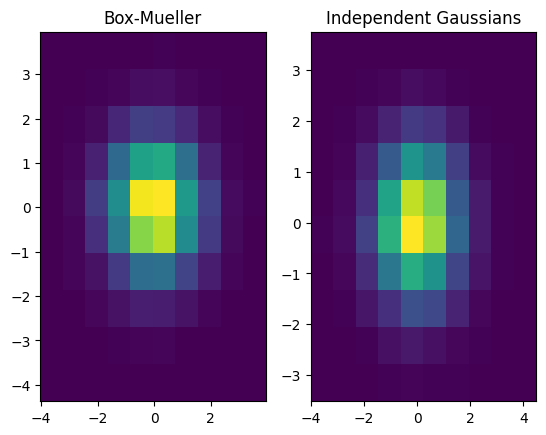

In [19]:
bm = [Box_Mueller() for _ in range(10000)]
x = [z[0] for z in bm]
y = [z[1] for z in bm]

plt.subplot(1, 2, 1)
plt.hist2d(x, y)
plt.title("Box-Mueller")

plt.subplot(1, 2, 2)
plt.hist2d(ra.normal(size=10000), ra.normal(size=10000))
plt.title("Independent Gaussians")
plt.show()

In [36]:
N = 10000
bm = [Box_Mueller() for _ in range(N)]
np.sum([z[0] * z[1] for z in bm]) / N

-0.012405686825321598

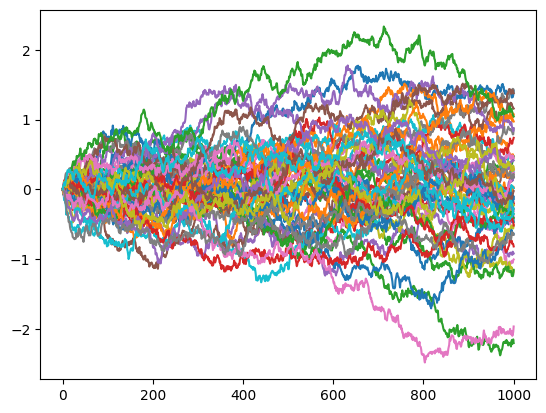

In [85]:
# Brownian Motion
N = 1000
epsilon = 1/N
C = np.array([[epsilon * min(i+1, j+1) for i in range(N)] for j in range(N)])
A = la.cholesky(C)

for _ in range(50):
    plt.plot(np.concatenate((np.array([0.0]), A @ ra.normal(size=N))))
plt.show()

In [89]:
# Stationary Ornstein-Uhlenbeck
N = 1000
epsilon = 1/N
C = np.zeros(shape=(N,N))

for i in range(N):
    for j in range(N):
        s = epsilon * (min(i,j)+1)
        t = epsilon * (max(i,j)+1)
        C[i,j] = 0.5 * np.exp(-2 * (t-s)) # * (1 - np.exp(-2 * s))

A = la.cholesky(C)

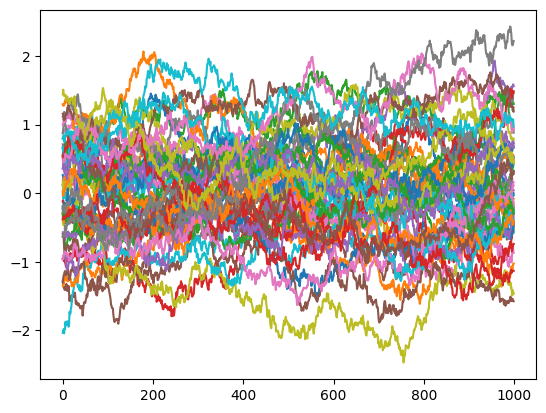

In [93]:
for _ in range(50):
    plt.plot(A @ ra.normal(size=N))
plt.show()

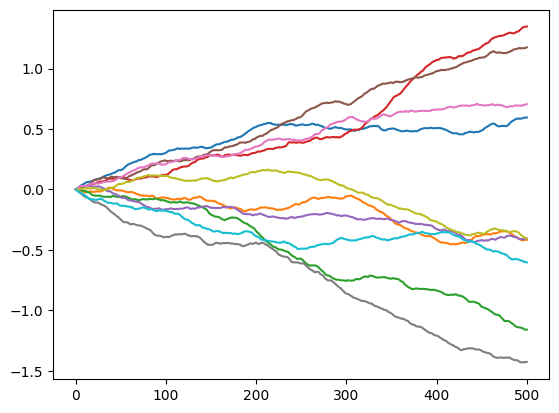

In [8]:
# Fractional Brownian Motion
N = 500
epsilon = 1/N
C = np.zeros(shape=(N,N))

H = 0.9

for i in range(N):
    for j in range(N):
        s = epsilon * (i+1)
        t = epsilon * (j+1)
        C[i,j] = 0.5 * (t ** (2 * H) + s ** (2 * H) - np.abs(t-s) ** (2 * H))

A = la.cholesky(C)

for _ in range(10):
    plt.plot(np.concatenate(([0], A @ ra.normal(size=N))))
plt.show()

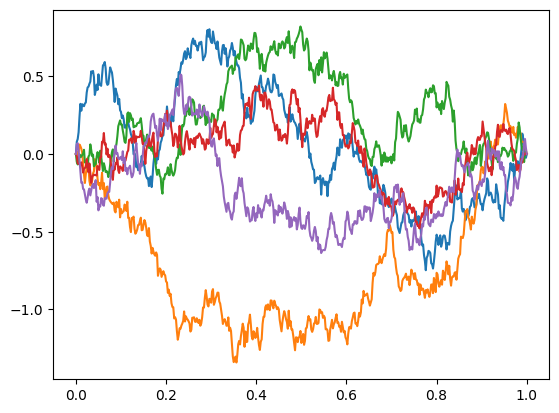

In [38]:
# Brownian Bridge

ra.seed(0)

N = 500
epsilon = 1/N
C = np.array([[epsilon ** 2 * (i+1) * (N - j-1) for i in range(N-1)] for j in range(N-1)])
A = la.cholesky(C)

for _ in range(5):
    plt.plot([epsilon * i for i in range(N+1)], np.concatenate(([0], A @ ra.normal(size=N-1), [0])))
plt.show()

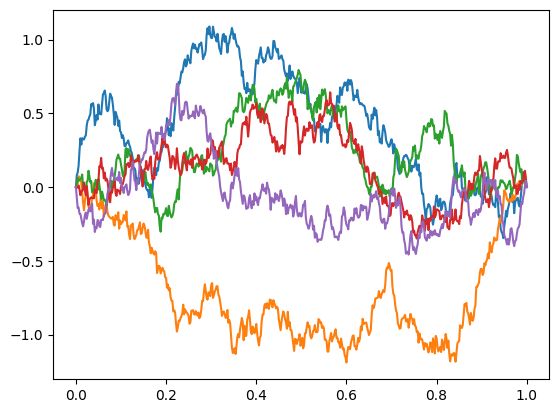

In [39]:
# Brownian Bridge by Correction

ra.seed(0)

N = 500
epsilon = 1/N
C = np.array([[epsilon * min(i+1, j+1) for i in range(N)] for j in range(N)])
A = la.cholesky(C)

for _ in range(5):
    b = np.concatenate(([0], A @ ra.normal(size=N)))
    z = np.array([b[i] - epsilon * i * b[-1] for i in range(N+1)])
    plt.plot([epsilon * i for i in range(N+1)], z)
plt.show()